<h1>Titanic Dataset</h1>
<img src="titanic.jpg" alt=titanic  width="400" height="100">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics



In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
#  To get the number of missing data points per column

missing_values_count=train.isna().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing Values heatmap')

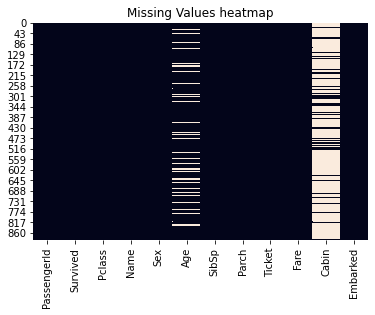

In [7]:
#To check the values missing in each column.

sns.heatmap(train.isna(),cbar=False).set_title("Missing Values heatmap")

In [8]:
# how many total missing values do we have?

total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()


# percent of data that is missing

percent_missing = (total_missing/total_cells) * 100
print("Shape of Data is:",train.shape)
print("Total cells present in  tha data is:",total_cells)
print("Missing Data in the dataset:",total_missing)
print("Total percentage of missing datas:",percent_missing)


Shape of Data is: (891, 12)
Total cells present in  tha data is: 10692
Missing Data in the dataset: 866
Total percentage of missing datas: 8.099513655069211


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


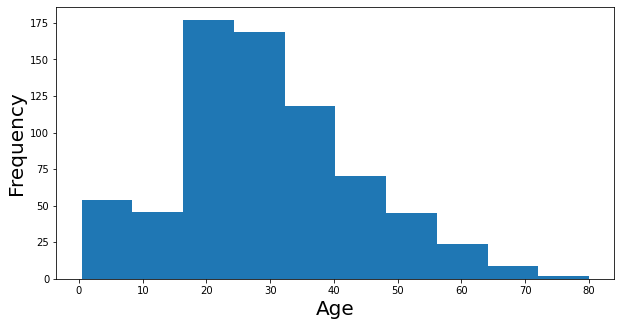

In [9]:
#To check the age group of the passengers in the ship.

print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')
age=train["Age"]
plt.figure(figsize=(10,5))
plt.hist(age)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

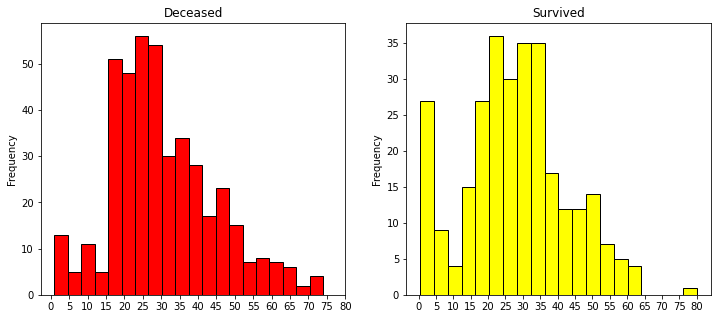

In [10]:
# To check the passengers' survival based on their age.
#  We can see the oldest passengers (age=80)  were  rescued and age below 5 years were rescued in large numbers and maximum deceased passengers were from age group 25 to 30.

f,ax=plt.subplots(1,2,figsize=(12,5))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Deceased')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='yellow',bins=20,edgecolor='black')
ax[1].set_title('Survived')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [11]:
# Count of passengers who survived and deceased.

train.Survived.value_counts()
print('Total passengers survived were:',train.Survived.value_counts()[1])
print('Total passengers deceased were:',train.Survived.value_counts()[0])

Total passengers survived were: 342
Total passengers deceased were: 549


Text(0.5, 1.0, 'Number of survivals')

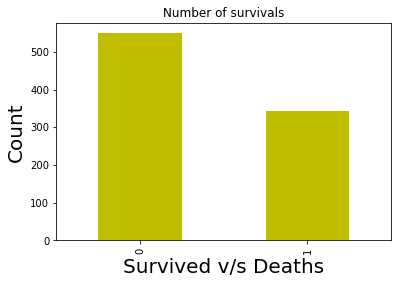

In [12]:
# To check the number of passengers survived:We can  clearly see that 342 passengers survived.

train.Survived.value_counts().plot(kind="bar",color='y')
plt.xlabel("Survived v/s Deaths",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of survivals")


C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


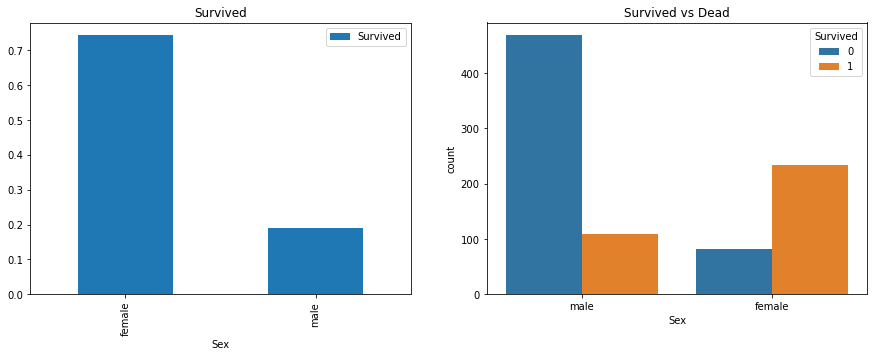

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

In [14]:
# To check the details who survived

train_survived=train[train['Survived']==1]
train_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
# To check the details who  did not survive

train_notsurvived = train[train["Survived"]==0]
train_notsurvived 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
# To check the passengers who survived from a particular class of the ship.

gb_class_survived=train_survived.groupby("Pclass")["Survived"].count()
gb_class_survived
print('Total passengers survived  from class 1 :',gb_class_survived[1])
print('Total passengers survived  from class 2 :',gb_class_survived[2])
print('Total passengers survived  from class 3 :',gb_class_survived[3])

Total passengers survived  from class 1 : 136
Total passengers survived  from class 2 : 87
Total passengers survived  from class 3 : 119


<AxesSubplot:title={'center':'Survived'}, xlabel='Pclass'>

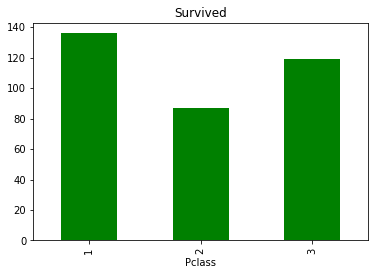

In [17]:
gb_class_survived.plot(kind='bar',color='g',title='Survived')

In [18]:
gb_class_notsurvived=train_notsurvived.groupby("Pclass")["Survived"].count()
print('Total passengers survived  from class 1 :',gb_class_notsurvived[1])
print('Total passengers survived  from class 2 :',gb_class_notsurvived[2])
print('Total passengers survived  from class 3 :',gb_class_notsurvived[3])

Total passengers survived  from class 1 : 80
Total passengers survived  from class 2 : 97
Total passengers survived  from class 3 : 372


<AxesSubplot:title={'center':'Not Survived'}, xlabel='Pclass'>

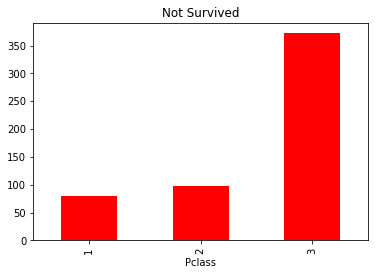

In [19]:
gb_class_notsurvived.plot(kind='bar',color='r',title="Not Survived")


In [20]:
# To check the number of passengers survived and  deceased in each class.

pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='gist_yarg')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


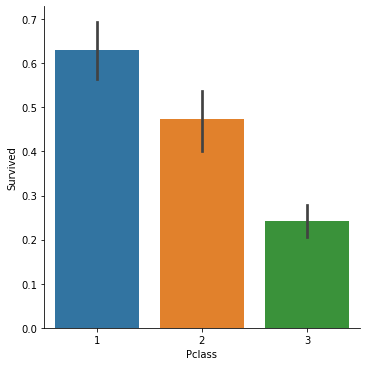

In [21]:
#    This clearly shows that people who have higher socioeconomic status have higher chances to survive
#      and people with lower status have a lower chance of survival 

sns.catplot(x="Pclass", y="Survived", data=train ,kind="bar");

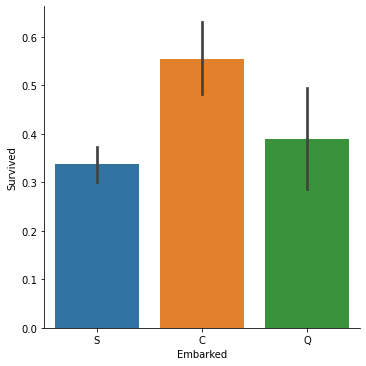

In [22]:
# This shows that Passengers embarked from Cherbourg port had higher chances of survival than  passengers embarked from Queenstown and then Southampton port.

sns.catplot(x="Embarked", y="Survived", data=train ,kind="bar");

In [23]:
pd.crosstab([train.Embarked],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='winter')

In [24]:
# To show the count of passengers who survived based on the classification of gender.

gb_sex_survived=train_survived.groupby("Sex")["Survived"].count()
gb_sex_survived

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Survived'}, xlabel='Sex'>

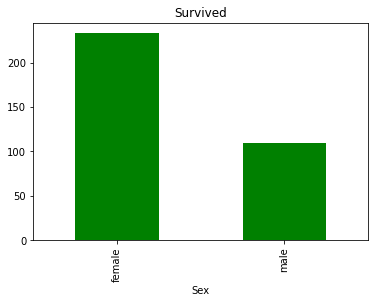

In [25]:
gb_sex_survived.plot(kind='bar',color='g',title='Survived')

In [26]:
#  We can check exact numbers of passengers survived and deceased in each class  based on sex.

pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='gist_yarg')

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


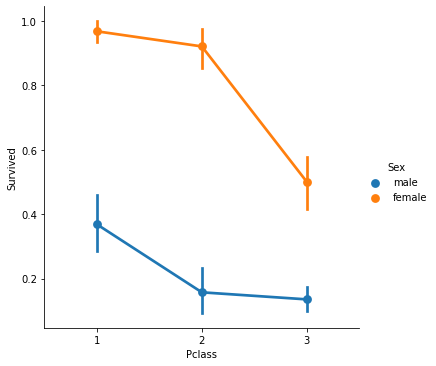

In [27]:
#It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()

In [28]:
# To show the count of passengers who  did not survive based on the classification of gender.

gb_sex_notsurvived=train_notsurvived.groupby("Sex")["Survived"].count()
gb_sex_notsurvived

Sex
female     81
male      468
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Not Survived'}, xlabel='Sex'>

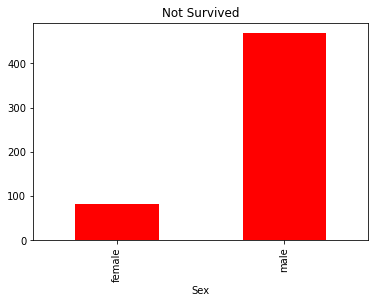

In [29]:
gb_sex_notsurvived.plot(kind='bar',color='red',title='Not Survived')

In [30]:
train.drop(["PassengerId"],inplace=True,axis=1)

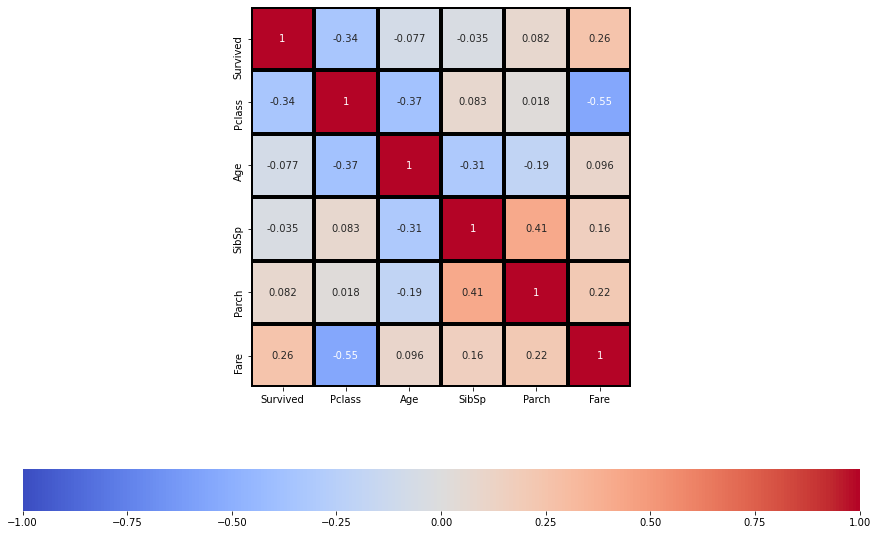

In [31]:
#To check the correlation between the variables

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(train.corr() ,annot=True ,fmt='.2g', vmax=1,vmin=-1,center=0, cmap="coolwarm",linewidths=3,linecolor='black' , cbar_kws= {'orientation': 'horizontal'} ,square=True,ax=ax)
plt.show()

In [32]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

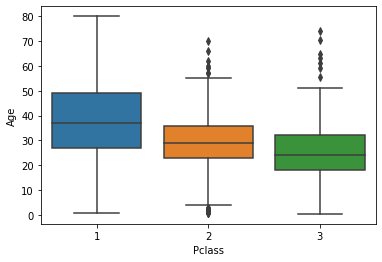

In [33]:
# the passengers with a Pclass value of 1 (the most expensive passenger class) tend to be the oldest
#while the passengers with a Pclass value of 3 (the cheapest) tend to be the youngest. 

sns.boxplot(train['Pclass'], train['Age'])

In [34]:
# Cleaning Age column 
    
#Pclass value 1

train[train['Pclass'] == 1]['Age'].mean()

#Pclass value 2

train[train['Pclass'] == 2]['Age'].mean()

#Pclass 3

train[train['Pclass'] == 2]['Age'].mean()



29.87763005780347

In [35]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return train[train['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return train[train['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return train[train['Pclass'] == 3]['Age'].mean()

        

    else:

        return age


In [36]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)


In [37]:
# Cleaning Embarked column

train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train["Embarked"].fillna(train.Embarked.mode()[0], inplace=True)

In [39]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [40]:
train["Sex"]=LabelEncoder().fit_transform(train["Sex"])
train["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [41]:
train.replace({"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [42]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.00000,0,0,211536,13.0000,NaN,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.00000,0,0,112053,30.0000,B42,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14062,1,2,W./C. 6607,23.4500,NaN,0
889,1,1,"Behr, Mr. Karl Howell",1,26.00000,0,0,111369,30.0000,C148,1


In [43]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.00000,0,0,211536,13.0000,NaN,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.00000,0,0,112053,30.0000,B42,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14062,1,2,W./C. 6607,23.4500,NaN,0
889,1,1,"Behr, Mr. Karl Howell",1,26.00000,0,0,111369,30.0000,C148,1


In [44]:
train.drop(["Cabin","Name","Ticket","Fare","Parch"],inplace=True ,axis=1)

In [45]:
X=train.drop(["Survived"],axis=1)

In [46]:
y=train["Survived"]

In [47]:
# Normalisation

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
X.head(5)

,Pclass,Sex,Age,SibSp,Embarked
0,1.0,1.0,0.271174,0.125,0.0
1,0.0,0.0,0.472229,0.125,0.5
2,1.0,0.0,0.321438,0.000,0.0
3,0.0,0.0,0.434531,0.125,0.0
4,1.0,1.0,0.434531,0.000,0.0


In [48]:
# TO check multi collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor  ##removing multicollinear variables

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [49]:
calculate_vif_(X)

Remaining variables:
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], dtype='object')


,Pclass,Sex,Age,SibSp,Embarked
0,1.0,1.0,0.271174,0.125,0.0
1,0.0,0.0,0.472229,0.125,0.5
2,1.0,0.0,0.321438,0.000,0.0
3,0.0,0.0,0.434531,0.125,0.0
4,1.0,1.0,0.434531,0.000,0.0
...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.0
887,0.0,0.0,0.233476,0.000,0.0
888,1.0,0.0,0.310639,0.125,0.0
889,0.0,1.0,0.321438,0.000,0.5


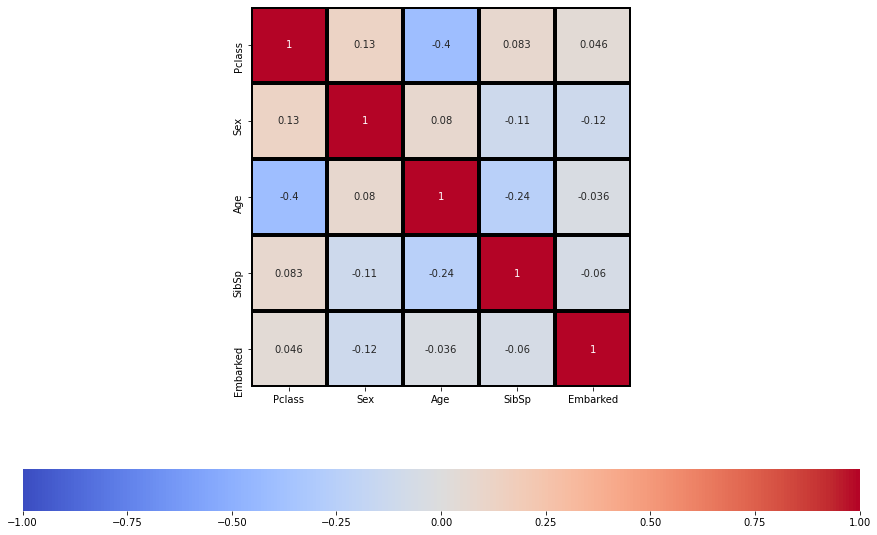

In [50]:
#To check the correlation between the variables

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(X.corr() ,annot=True ,fmt='.2g', vmax=1,vmin=-1,center=0, cmap="coolwarm",linewidths=3,linecolor='black' , cbar_kws= {'orientation': 'horizontal'} ,square=True,ax=ax)
plt.show()

In [51]:
# Training the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [52]:
# Tree model

model_1 = DecisionTreeClassifier() 
model_1=model_1.fit(X_train, y_train)
y_pred=model_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597765363128491


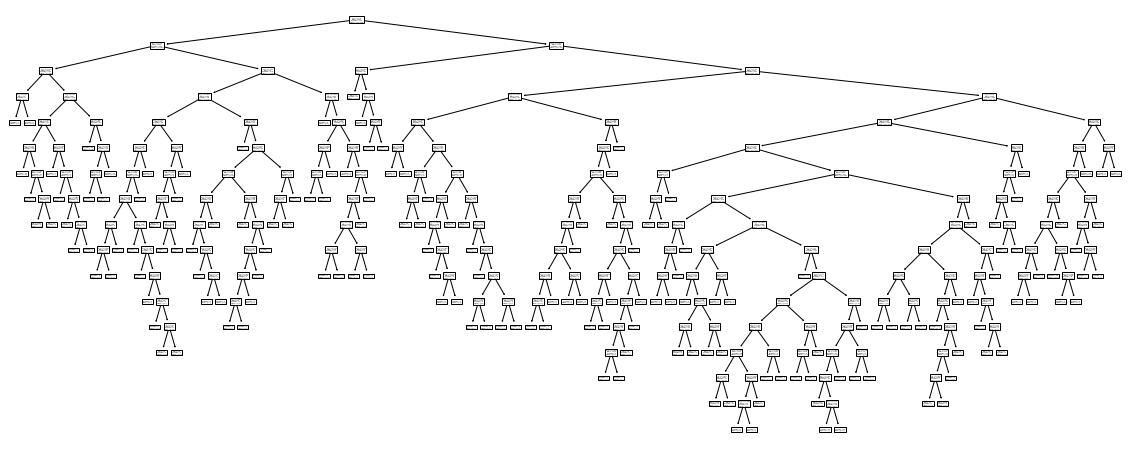

In [53]:
plt.figure(figsize = (20, 8))
tree.plot_tree(model_1);
plt.axis('off');
plt.show();


In [54]:
 # Tree model using criterion
    
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_2 = model_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


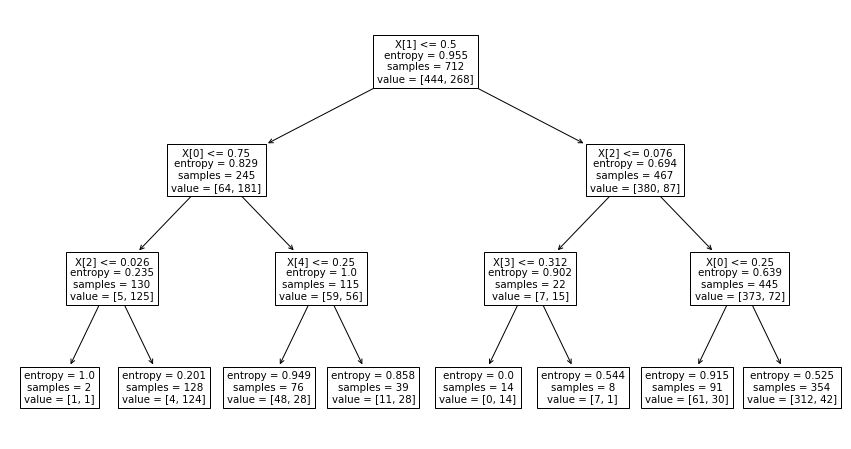

In [55]:
plt.figure(figsize = (15, 8))
tree.plot_tree(model_2);
plt.axis('off');
plt.show();


In [56]:
 # Tree model using criterion
    
model_3 = DecisionTreeClassifier(max_depth=3,random_state=0,splitter="random") 
model_3=model_3.fit(X_train, y_train)
y_pred=model_3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7653631284916201


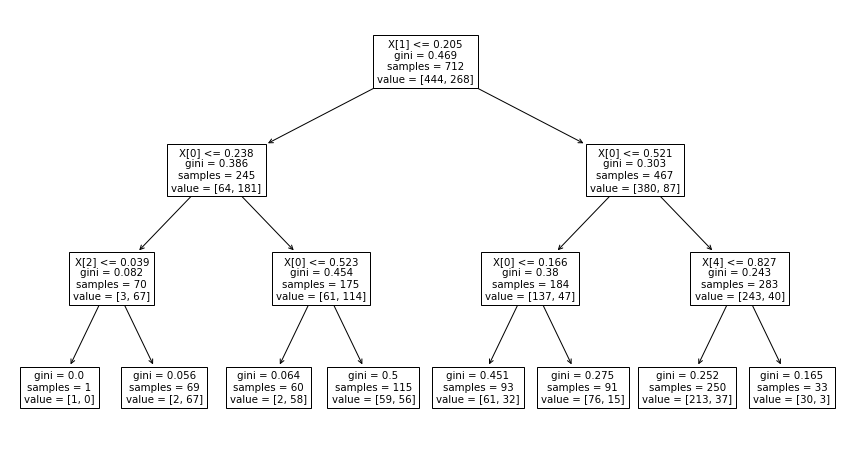

In [57]:
plt.figure(figsize = (15, 8))
tree.plot_tree(model_3);
plt.axis('off');
plt.show();

In [58]:
model_4 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=7,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, 
            random_state=1, splitter='best')
model_4=model_4.fit(X_train, y_train)
y_pred=model_4.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6927374301675978


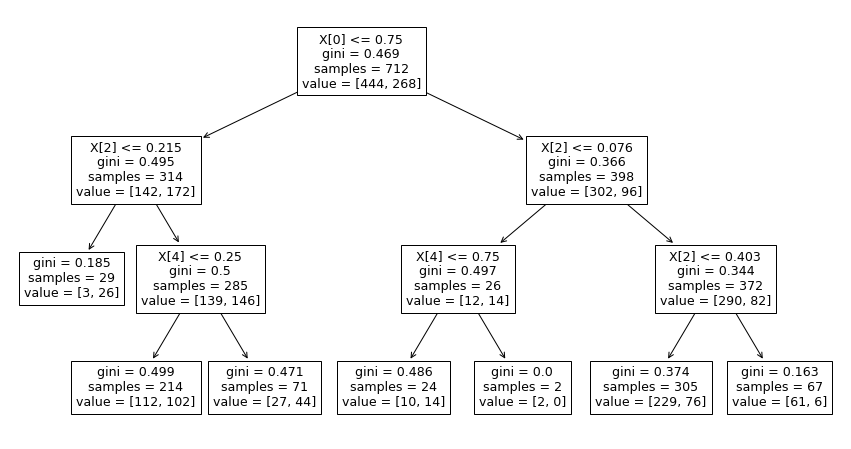

In [59]:
plt.figure(figsize = (15, 8))
tree.plot_tree(model_4);
plt.axis('off');
plt.show();

In [60]:
# logistic Regression model

model_lr = LogisticRegression()
model_lr.fit(X_train , y_train)
y_pred=model_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7932960893854749


In [61]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[89 16]
 [21 53]]
